In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.txt')

In [3]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
test = pd.read_csv('Test.txt')

In [5]:
test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [6]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [7]:
df_train = pd.read_csv('Train.txt', names=datacols)

In [8]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
df_test = pd.read_csv('Test.txt', names=datacols)

In [10]:
df_train.shape

(125973, 43)

In [11]:
df_train = df_train.iloc[:,:-1]

In [12]:
df_test = df_test.iloc[:, :-1]

In [13]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [14]:
df_train['attack_class'] = df_train['attack'].apply(lambda x: mapping[x])

In [15]:
df_train[['attack_class']].head()

,attack_class
0,Normal
1,Normal
2,DoS
3,Normal
4,Normal


In [16]:
df_test['attack_class'] = df_test['attack'].apply(lambda x: mapping[x])

In [17]:
df_train = df_train.drop('attack', axis=1)

In [18]:
df_test = df_test.drop('attack', axis=1)

In [19]:
df_train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,Normal


**EDA**

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [22]:
df_train = df_train.drop('num_outbound_cmds', axis=1)

In [23]:
df_test = df_test.drop('num_outbound_cmds', axis=1)

In [24]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [25]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [26]:
for c in dict(df_train.dtypes).items():
    print(c)
    

('duration', dtype('int64'))
('protocol_type', dtype('O'))
('service', dtype('O'))
('flag', dtype('O'))
('src_bytes', dtype('int64'))
('dst_bytes', dtype('int64'))
('land', dtype('int64'))
('wrong_fragment', dtype('int64'))
('urgent', dtype('int64'))
('hot', dtype('int64'))
('num_failed_logins', dtype('int64'))
('logged_in', dtype('int64'))
('num_compromised', dtype('int64'))
('root_shell', dtype('int64'))
('su_attempted', dtype('int64'))
('num_root', dtype('int64'))
('num_file_creations', dtype('int64'))
('num_shells', dtype('int64'))
('num_access_files', dtype('int64'))
('is_host_login', dtype('int64'))
('is_guest_login', dtype('int64'))
('count', dtype('int64'))
('srv_count', dtype('int64'))
('serror_rate', dtype('float64'))
('srv_serror_rate', dtype('float64'))
('rerror_rate', dtype('float64'))
('srv_rerror_rate', dtype('float64'))
('same_srv_rate', dtype('float64'))
('diff_srv_rate', dtype('float64'))
('srv_diff_host_rate', dtype('float64'))
('dst_host_count', dtype('int64'))
('ds

In [27]:
num_cols = [x[0] for x in dict(df_train.dtypes).items() if x[1] in ['int64', 'float64']]

In [28]:
df_train_num = df_train[num_cols].copy()

In [29]:
df_test_num = df_test[num_cols].copy()

## Scaling the variables

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df_train_num)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaler.fit_transform(df_train_num)

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.6248708 ,
        -0.22453241, -0.37638703],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.6248708 ,
        -0.35501418, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703]])

In [34]:
df_train_num = scaler.fit_transform(df_train_num)

In [35]:
df_test_num = scaler.fit_transform(df_test_num)

In [36]:
df_train_num = pd.DataFrame(df_train_num, columns=num_cols)

In [37]:
df_test_num = pd.DataFrame(df_test_num, columns=num_cols)

In [38]:
df_train_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387


In [39]:
df_test_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682


## Encoding the Categorical Variables

In [40]:
categ_cols = [x[0] for x in dict(df_train.dtypes).items() if x[1] not in ['int64', 'float64']]

In [41]:
df_train_categ = df_train[categ_cols].copy()

In [42]:
df_train_categ.head()

,protocol_type,service,flag,attack_class
0,tcp,ftp_data,SF,Normal
1,udp,other,SF,Normal
2,tcp,private,S0,DoS
3,tcp,http,SF,Normal
4,tcp,http,SF,Normal


In [43]:
df_test_categ = df_test[categ_cols].copy()

In [44]:
df_test_categ.dtypes

protocol_type    object
service          object
flag             object
attack_class     object
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lbl = LabelEncoder()

In [47]:
df_train_categ = df_train_categ.apply(lbl.fit_transform)

In [48]:
df_test_categ = df_test_categ.apply(lbl.fit_transform)

In [49]:
df_test.count()

duration                       22544
protocol_type                  22544
service                        22544
flag                           22544
src_bytes                      22544
dst_bytes                      22544
land                           22544
wrong_fragment                 22544
urgent                         22544
hot                            22544
num_failed_logins              22544
logged_in                      22544
num_compromised                22544
root_shell                     22544
su_attempted                   22544
num_root                       22544
num_file_creations             22544
num_shells                     22544
num_access_files               22544
is_host_login                  22544
is_guest_login                 22544
count                          22544
srv_count                      22544
serror_rate                    22544
srv_serror_rate                22544
rerror_rate                    22544
srv_rerror_rate                22544
s

In [50]:
df_train.count()

duration                       125973
protocol_type                  125973
service                        125973
flag                           125973
src_bytes                      125973
dst_bytes                      125973
land                           125973
wrong_fragment                 125973
urgent                         125973
hot                            125973
num_failed_logins              125973
logged_in                      125973
num_compromised                125973
root_shell                     125973
su_attempted                   125973
num_root                       125973
num_file_creations             125973
num_shells                     125973
num_access_files               125973
is_host_login                  125973
is_guest_login                 125973
count                          125973
srv_count                      125973
serror_rate                    125973
srv_serror_rate                125973
rerror_rate                    125973
srv_rerror_r

In [51]:
df_train.shape

(125973, 41)

In [52]:
df_train_new = pd.concat([df_train_num, df_train_categ], sort=False, axis=1)

In [53]:
df_train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,20,9,1
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2,44,9,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1,49,5,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,24,9,1
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,24,9,1


In [54]:
df_test_new = pd.concat([df_test_num, df_test_categ], sort=False, axis=1)

In [55]:
df_test_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9,1
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9,2
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2,2


In [56]:
df_train_y = df_train_new['attack_class'].copy()

In [57]:
df_test_y = df_test_new['attack_class'].copy()

In [58]:
df_train_new.drop('attack_class', axis=1, inplace=True)

In [59]:
df_test_new.drop('attack_class', axis=1, inplace=True)

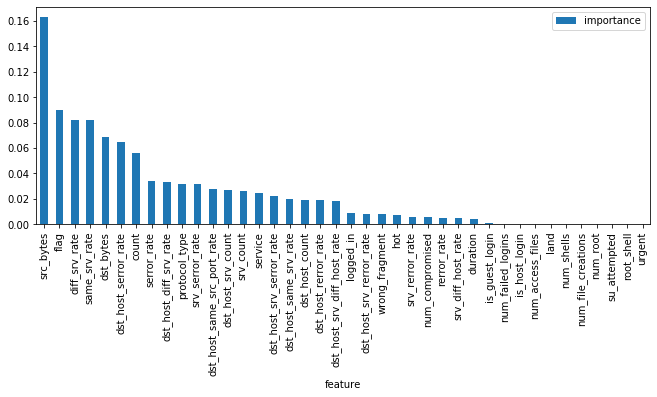

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(df_train_new, df_train_y)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':df_train_new.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [61]:
from sklearn.feature_selection import RFE

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfe = RFE(rfc, n_features_to_select=10)

In [64]:
rfe = rfe.fit(df_train_new, df_train_y)

In [66]:
df_train_new.columns[rfe.get_support()]

Index(['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'protocol_type', 'flag'],
      dtype='object')

In [67]:
relevant_cols = list(df_train_new.columns[rfe.get_support()])

In [68]:
relevant_cols

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'flag']

In [69]:
df_train_new = df_train_new[relevant_cols]

In [70]:
df_test_new = df_test_new[relevant_cols]

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df_train_new, df_train_y,train_size=0.70)

In [75]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
# from sklearn.svm import SVC 
# from sklearn.naive_bayes import BernoulliNB 
# from sklearn import tree
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

# # Train KNeighborsClassifier Model
# KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
# KNN_Classifier.fit(df_train_new, df_train_y); 

# # Train LogisticRegression Model
# LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
# LGR_Classifier.fit(df_train_new, df_train_y);

# # Train Gaussian Naive Baye Model
# BNB_Classifier = BernoulliNB()
# BNB_Classifier.fit(df_train_new, df_train_y)
            
# # Train Decision Tree Model
# DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
# DTC_Classifier.fit(df_train_new, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [76]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8662636389076338

Model Accuracy:
 0.8662637076014107

Confusion matrix:
 [[28539  1797  1835    13     0]
 [ 1264 43106  2558   235     0]
 [ 1649  1759  4699     1     0]
 [    3   609    31    44     0]
 [    1    31     7     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     32184
           1       0.91      0.91      0.91     47163
           2       0.51      0.58      0.55      8108
           3       0.15      0.06      0.09       687
           4       0.00      0.00      0.00        39

    accuracy                           0.87     88181
   macro avg       0.50      0.49      0.49     88181
weighted avg       0.87      0.87      0.87     88181



============================== Decision Tree Classifier Model Evaluation ==============================

Cros

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# from sklearn import metrics

# models = []
# models.append(('Naive Baye Classifier', BNB_Classifier))
# models.append(('Decision Tree Classifier', DTC_Classifier))
# models.append(('KNeighborsClassifier', KNN_Classifier))
# models.append(('LogisticRegression', LGR_Classifier))

# for i, v in models:
#     scores = cross_val_score(v, df_train_new, df_train_y, cv=10)
#     accuracy = metrics.accuracy_score(df_train_y, v.predict(df_train_new))
#     confusion_matrix = metrics.confusion_matrix(df_train_y, v.predict(df_train_new))
#     classification = metrics.classification_report(df_train_y, v.predict(df_train_new))
#     print()
#     print('============================== {} Model Evaluation =============================='.format(i))
#     print()
#     print ("Cross Validation Mean Score:" "\n", scores.mean())
#     print()
#     print ("Model Accuracy:" "\n", accuracy)
#     print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
#     print("Classification report:" "\n", classification) 
#     print()

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8658601196294781

Model Accuracy:
 0.8657648861263921

Confusion matrix:
 [[40682  2591  2634    20     0]
 [ 1820 61554  3625   344     0]
 [ 2358  2528  6768     2     0]
 [    3   890    43    59     0]
 [    2    43     7     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     45927
           1       0.91      0.91      0.91     67343
           2       0.52      0.58      0.55     11656
           3       0.14      0.06      0.08       995
           4       0.00      0.00      0.00        52

    accuracy                           0.87    125973
   macro avg       0.49      0.49      0.49    125973
weighted avg       0.87      0.87      0.87    125973



============================== Decision Tree Classifier Model Evaluation ==============================

Cros

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8646009737510584

Confusion matrix:
 [[12143   794   799     7     0]
 [  556 18448  1067   109     0]
 [  709   769  2069     1     0]
 [    0   281    12    15     0]
 [    1    12     0     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     13743
           1       0.91      0.91      0.91     20180
           2       0.52      0.58      0.55      3548
           3       0.11      0.05      0.07       308
           4       0.00      0.00      0.00        13

    accuracy                           0.86     37792
   macro avg       0.49      0.49      0.49     37792
weighted avg       0.86      0.86      0.86     37792



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9964278154106689

Confusion mat

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# for i, v in models:
#     accuracy = metrics.accuracy_score(df_test_y, v.predict(df_test_new))
#     confusion_matrix = metrics.confusion_matrix(df_test_y, v.predict(df_test_new))
#     classification = metrics.classification_report(df_test_y, v.predict(df_test_new))
#     print()
#     print('============================== {} Model Test Results =============================='.format(i))
#     print()
#     print ("Model Accuracy:" "\n", accuracy)
#     print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
#     print("Classification report:" "\n", classification) 
#     print()        


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.6592885024840313

Confusion matrix:
 [[4628 2215  615    0    0]
 [  82 9298  296   35    0]
 [1220  477  724    0    0]
 [  84 2393   64  213    0]
 [  18  174    5    3    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69      7458
           1       0.64      0.96      0.77      9711
           2       0.42      0.30      0.35      2421
           3       0.85      0.08      0.14      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.66     22544
   macro avg       0.54      0.39      0.39     22544
weighted avg       0.68      0.66      0.61     22544



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.6643896380411639

Confusion matrix:
 [[5425 1367  617   

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
pred_knn = KNN_Classifier.predict(df_test_new)
pred_NB = BNB_Classifier.predict(df_test_new)
pred_log = LGR_Classifier.predict(df_test_new)
pred_dt = DTC_Classifier.predict(df_test_new)